![logo](Data/logo.png)

This notebook is an example of how to use the [fdsreader](https://github.com/FireDynamics/fdsreader) livrairy to extract data from FDS simulation. 

In [17]:
import fdsreader
import numpy as np 
import matplotlib.pyplot as plt

# 1. load simulation 

In [18]:
sim = fdsreader.Simulation('Data/Steckler/')


## 2. load devices to panda data frame

In [3]:
df_dev = sim.devices.to_pandas_dataframe()
tc_roomV = df_dev.filter(regex='Time|RoomV-') # select time and thermocouples "room" time varying line
tc_roomS = df_dev.filter(regex='Time|RoomS_') # steady state from 50 to 100s

In [4]:
tc_roomV

,Time,TC_RoomV-1,TC_RoomV-2,TC_RoomV-3,TC_RoomV-4,TC_RoomV-5,TC_RoomV-6,TC_RoomV-7,TC_RoomV-8,TC_RoomV-9,...,TC_RoomV-35,TC_RoomV-36,TC_RoomV-37,TC_RoomV-38,TC_RoomV-39,TC_RoomV-40,TC_RoomV-41,TC_RoomV-42,TC_RoomV-43,TC_RoomV-44
0,0.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
1,10.080000,22.010000,22.010000,22.010000,22.010000,22.010000,22.010000,22.010000,22.010000,22.010000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
2,20.070000,22.139999,22.139999,22.080000,22.080000,22.090000,22.090000,22.090000,22.090000,22.080000,...,22.020000,22.020000,22.020000,22.020000,22.020000,22.020000,22.020000,22.020000,22.030001,22.030001
3,30.059999,22.330000,22.330000,22.160000,22.160000,22.180000,22.180000,22.190001,22.190001,22.200001,...,22.350000,22.350000,23.770000,23.770000,26.410000,26.410000,28.900000,28.900000,32.630001,32.630001
4,40.070000,22.549999,22.549999,22.260000,22.260000,22.309999,22.309999,22.340000,22.340000,22.379999,...,32.320000,32.320000,31.180000,31.180000,32.570000,32.570000,37.290001,37.290001,44.009998,44.009998
5,50.049999,22.760000,22.760000,22.370001,22.370001,22.469999,22.469999,22.549999,22.549999,22.660000,...,34.990002,34.990002,43.360001,43.360001,46.310001,46.310001,44.700001,44.700001,51.889999,51.889999
6,60.029999,22.969999,22.969999,22.510000,22.510000,22.660000,22.660000,22.850000,22.850000,23.150000,...,39.509998,39.509998,37.250000,37.250000,41.450001,41.450001,47.959999,47.959999,56.529999,56.529999
7,70.010002,23.170000,23.170000,22.639999,22.639999,22.940001,22.940001,23.750000,23.750000,25.260000,...,42.520000,42.520000,43.240002,43.240002,46.400002,46.400002,53.599998,53.599998,58.759998,58.759998
8,80.120003,23.370001,23.370001,22.770000,22.770000,23.450001,23.450001,25.139999,25.139999,25.700001,...,48.009998,48.009998,54.110001,54.110001,58.099998,58.099998,59.000000,59.000000,62.169998,62.169998
9,90.139999,23.639999,23.639999,22.900000,22.900000,23.500000,23.500000,24.879999,24.879999,24.700001,...,59.849998,59.849998,59.200001,59.200001,61.080002,61.080002,66.110001,66.110001,69.949997,69.949997


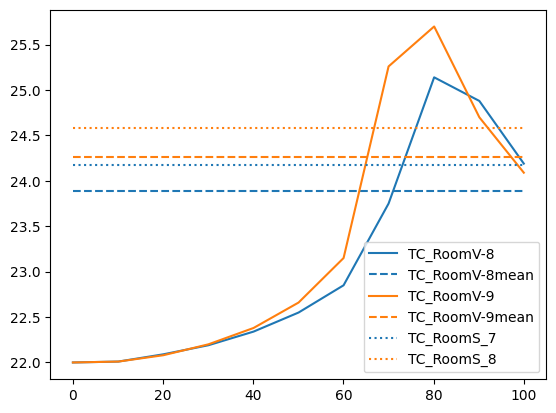

In [5]:
#plot time varying and mean of time varying over [50-100]s
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i,tcname in enumerate(tc_roomV.columns[8:10]):
    if tcname == 'Time': continue
    plt.plot(tc_roomV['Time'], tc_roomV[tcname],label=tcname, c=tab_colors[i])
    plt.plot(tc_roomV['Time'], [tc_roomV[tcname][5:].mean()]*len(tc_roomV),label=tcname+'mean', ls='--',c=tab_colors[i]) 

#plot steady state over [50-100]s
for tcname in tc_roomS.columns[8:10]:
    if tcname == 'Time': continue
    plt.plot(tc_roomS['Time'], tc_roomS[tcname],label=tcname,ls=':')
    
plt.legend()


The running average from the steady state of the second device is not equal to the mean of the time varying device.
The average in both case is not made on the same frequence.

## 3. load slice data

To show the quantities stored in the slice 
fds version 6.7.7 is used here. Output from 6.9.1 failed to be loaded.

In [19]:
sim.slices # to show available slice

SliceCollection([Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=True, extent=Extent([0.00, 3.60] x [0.10, 0.10] x [0.00, 2.13]), extent_dirs=('x', 'z'), orientation=2),
Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=True, extent=Extent([0.00, 3.60] x [0.10, 0.10] x [0.00, 2.13]), extent_dirs=('x', 'z'), orientation=2)])

In [20]:
tempSlc = sim.slices[0] # to select temperature

In [21]:
temp, grid = tempSlc.to_global(masked=True, fill=np.nan, return_coordinates=True) 
times = tempSlc.times

In [22]:
print( 'temp shape : ',temp.shape)
print( 'time shape : ',times.shape)

temp shape :  (11, 36, 22)
time shape :  (11,)


Text(0.5, 1.0, 't=100.00s')

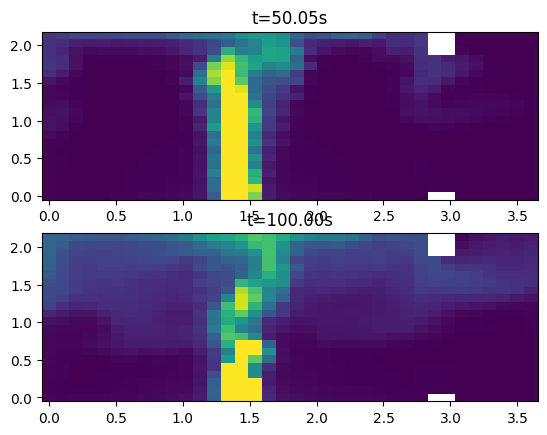

In [37]:
itime = 5
ax = plt.subplot(211)
ax.pcolormesh(grid['x'], grid['z'],temp[itime].T,vmax=200)
ax.set_title('t={:.2f}s'.format(times[itime]))

itime = 10
ax = plt.subplot(212)
ax.pcolormesh(grid['x'], grid['z'],temp[itime].T,vmax=200)
ax.set_title('t={:.2f}s'.format(times[itime]))